## Evaluation of Multiple Integrals

**Date: 06-10-2023**

In [49]:
import numpy as np
import sympy as sym
from scipy import integrate
import matplotlib.pyplot as plt

> scipy.integrate.dblquad(func,a,b, gfun, hfun)<br>
$\quad$ Return the double (definite) integral of func(y, x) from x = a..b and y = gfun(x)..hfun(x). <br>
func : callable<br>
A Python function or method of at least two variables: y must be the first argument and x the second argument.<br>
a,b : float<br>
The limits of integration in x: a <br>
Returns:<br>
    y: float<br>
The resultant integral.<br>
    abserr: float<br>
An estimate of the error.

> $\int^1_2 \int^1_0 ~xy^2~\text{d}x\text{d}y\text{d}z$

In [16]:
f = lambda y,x: x*y**2
integrate.dblquad(f, 0, 2, 0, 1)

(0.6666666666666667, 7.401486830834377e-15)

In [30]:
x,y = sym.symbols("x,y")
f = x*y**2
float(sym.integrate(sym.integrate(f,(x,0,2)),(y,0,1)))

0.6666666666666666

**Triple Integral**
> scipy.integrate.tplquad(func,a,b, gfun, hfun)<br>

In [32]:
f = lambda z,y,x: x*y*z
integrate.tplquad(f, 1,2,2,3,0, 1)

(1.8750000000000002, 3.324644794257407e-14)

In [ ]:
> $\int^1_0 \int^{1-x}_0 \int^{1-x-y}_0 ~\dfrac{1}{(x+y+z+1)^3}~\text{d}x\text{d}y\text{d}z$

> $\int^1_0 \int^{1-x}_0 \int^{1-x-y}_0 ~\dfrac{1}{(x+y+z+1)^3}~\text{d}x\text{d}y\text{d}z$

In [33]:
f = lambda z,y,x: 1/(x+y+z+1)**3
integrate.tplquad(f, 0,1,0,lambda x:1-x,0, lambda y,x: 1-x-y)

(0.03407359027997265, 4.115485115326547e-15)

In [38]:
-5/16 + np.log(np.sqrt(2))

0.0340735902799727

> $\int^1_0 \int^{1-2x}_0 \int^{1-x-2y}_0~xyz~\text{d}x\text{d}y\text{d}z$

In [43]:
f = lambda z,y,x: x*y*z
integrate.tplquad(f, 0,1,0,lambda x:1-2*x,0, lambda y,x: 1-x-2*y)

(0.004166666666666668, 8.079246123413401e-16)

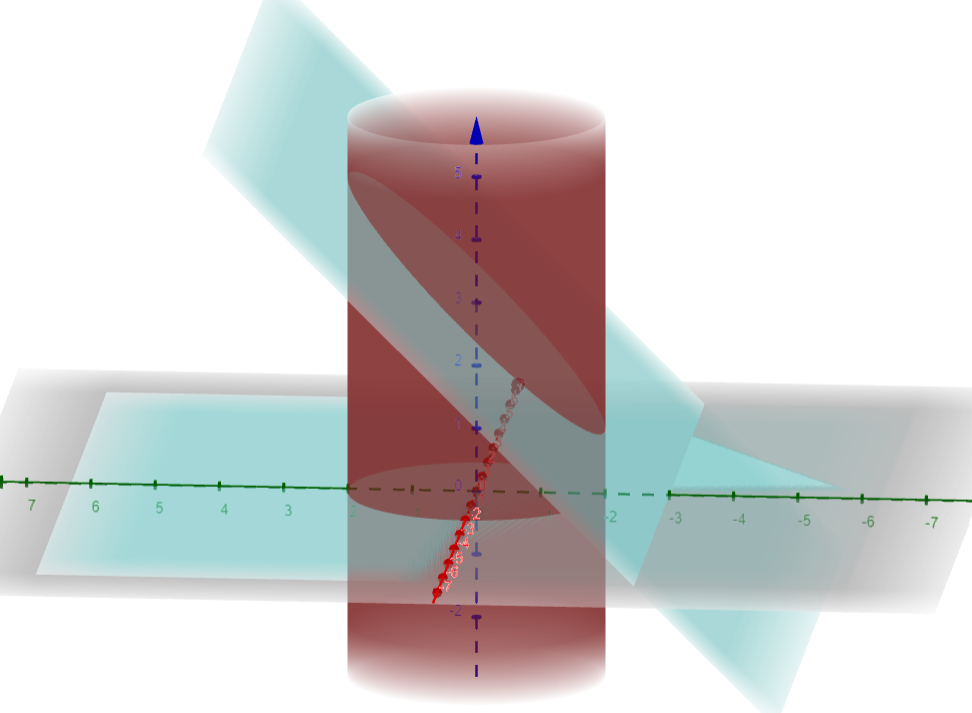

> $\int^2_0 \int^{\sqrt{4 - x^2}}_0 \int^{y}_0~\text{d}z\text{d}y\text{d}x$

In [52]:
f = lambda z,y,x: 1
integrate.tplquad(f, 0,2, 0,lambda x:(4-x**2)**0.5,0, lambda y,x: y)

(2.6666666666666607, 3.5216127791670715e-09)

In [53]:
8/3

2.6666666666666665

## Plotting of Double Integrals

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt;
import numpy as np;
import sympy as sym;
from scipy import integrate

<IPython.core.display.Javascript object>


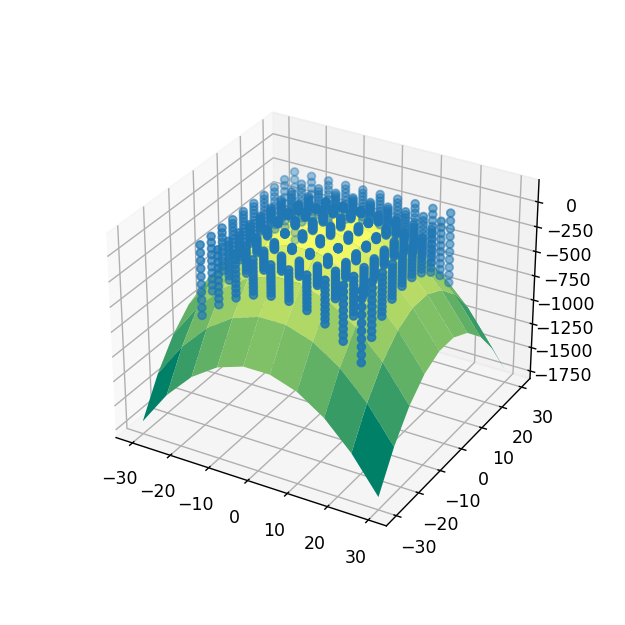

(-266666.6666666666, 2.9605947323337505e-09)
-446273.4339277552


In [3]:
def getVolume(x,y,f,npoints):
    vol = 0;
    X = np.linspace(x[0],x[1],npoints)
    Y = np.linspace(y[0],y[1],npoints)
    space = X[1] - X[0]
    #print(space)
    points = [];
    for xx in X:
        for yy in Y:
            for zz in np.linspace(0,f(xx,yy),npoints):
                points.append([xx,yy,zz]);
            vol += f(xx,yy)*(space**2)
    return np.transpose(points),vol

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection = "3d");

#x_constraint,y_constraint = eval(input())
x_constraint,y_constraint = [-20,20],[-20,20];
lim,npoints = 30,10;
xx,yy = np.meshgrid(np.linspace(-lim,lim,npoints),np.linspace(-lim,lim,npoints))

f = lambda x,y: -x**2 - y**2 + 100

ax.plot_surface(xx,yy,f(xx,yy),cmap = "summer")

#getVolume(x_constraint,y_constraint,f,npoints)
V_points,V = getVolume(x_constraint,y_constraint,f,npoints)

ax.scatter3D(V_points[0],V_points[1],V_points[2])

print(integrate.dblquad(f, x_constraint[0], x_constraint[1], y_constraint[0], y_constraint[1]))
print(V)